# Part II - (Ride Duration by Age)
## by ('Yomi Okungbure)

## Investigation Overview


> My goal with this data set was to find the relation between the rider's age and the duration of their bike rides, as well as the distribution by gender.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data set contains 183,412 observations along with 16 variables, most of which a numeric.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Initial Data Wrangling
df.dropna(subset=['member_gender', 'member_birth_year'], inplace=True) # Dropping null values
df['duration_min'] = df.duration_sec/60 # Adding a minute column
df.member_birth_year = df.member_birth_year.astype(int) # Changing birth year from float to int
df['age'] = 2022 - df.member_birth_year # Creating an age column
df = df[((df.age >= 18) &( df.age <= 80))] # Limiting the age

In [4]:
# Creating separate filtered data sets
df_1 = df[(df['member_birth_year'] >= 1980) & (df['member_birth_year'] <= 1990)]
df_2 = df[(df['member_birth_year'] > 1990) & (df['member_birth_year'] <= 2002)]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of riders according to birth year

> From the histogram below we see that observations within this dataset are concentrated around those born between 1980 & 2000. This makes sense as these group of people would be the most mobile in terms of commute, while older or younger people would be riding as practise or as hobbyists.

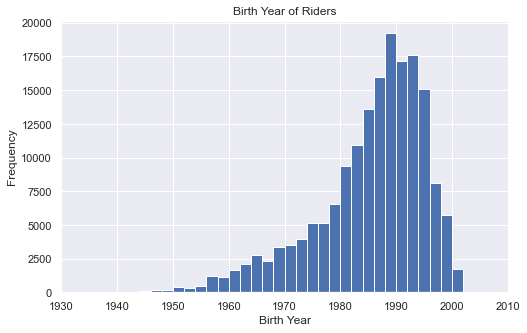

In [5]:
binsize = 2
bins = np.arange(0, df['member_birth_year'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlim([1930,2010])
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('Birth Year of Riders')
plt.show()

## Heatmap of ride duration by birth year

> Sure enough, when we look at a heatmap to give an idea where most of the rides lie, it further highlights a huge chunk of rides within that block of birth years

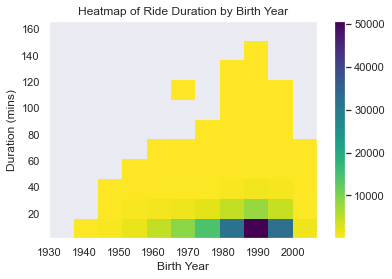

In [6]:
bins_x = np.arange(1930, df.member_birth_year.max()+7, 7)
bins_y = np.arange(df.duration_min.min(), 160+15, 15)
plt.hist2d(data = df, x = 'member_birth_year', y = 'duration_min', cmin=15, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Birth Year')
plt.ylabel('Duration (mins)')
plt.title('Heatmap of Ride Duration by Birth Year');

## Heatmap of rides by age

> If we increase the granularity for the dataset by looking at the ride duration by age, we see that riders aged betweeb 27 & 38 have the highest number of rides



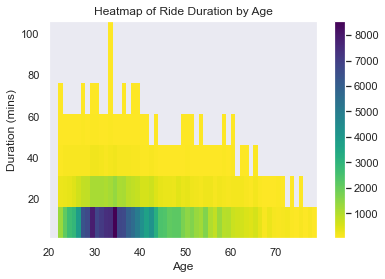

In [7]:
bins_x = np.arange(20, 80, 1)
bins_y = np.arange(df.duration_min.min(), 120, 15)
plt.hist2d(data = df, x = 'age', y = 'duration_min', cmin=15, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration (mins)')
plt.title('Heatmap of Ride Duration by Age');

## Scatterplot for ride duration by Gender

> Looking at the scatter plot for the age and duration split by gender, we see that males aged between 30 & 40have the highest ride duration, also for older people (> 70), females & males have a higher number people riding for 0 ~ 20 minutes.

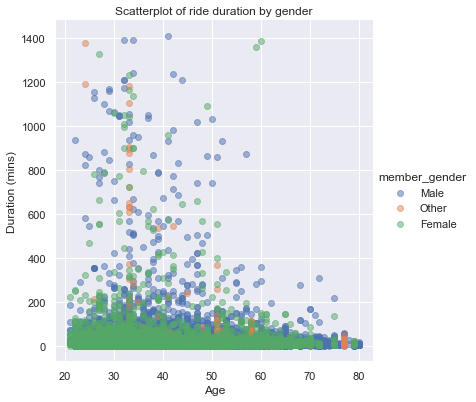

In [8]:
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 5.5)
g.map(plt.scatter, 'age', 'duration_min',  alpha = 5/10)
g.add_legend()
plt.xlabel('Age')
plt.ylabel('Duration (mins)')
plt.title('Scatterplot of ride duration by gender');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

'jupyter' is not recognized as an internal or external command,
operable program or batch file.


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
